In [58]:
# http://neuralnetworksanddeeplearning.com/chap1.html was referenced while completing this homework.

import numpy as np
import random
import cPickle
import gzip
import matplotlib.pyplot as plt

In [54]:
class Network():
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x,y in zip(sizes[:-1], sizes[1:])]

    def determine(self, inputs):
        act = inputs
        for w,b in zip(self.weights, self.biases):
            z = np.dot(w,act) + b
            act = self.sigma(z)
        return act

    def stoch_minibatch_GD(self, training_data, epochs, alpha, batch_size=None):
        if not batch_size:
            batch_size = len(training_data)
        error_vals = []
        for i in xrange(epochs):
            random.shuffle(training_data)
            batches = [training_data[k:k+batch_size] for k in xrange(0, len(training_data), batch_size)]
            for batch in batches:
                self.update_params_for_batch(batch, alpha)
            total_error = self.calc_error(training_data)
            print "Epoch", i, ", Error:", total_error
            error_vals.append(total_error)
        plt.xlim(xmin=0, xmax = epochs + 1.5)
        plt.ylim(ymin=0.0, ymax = max(error_vals) + 0.5)
        plt.ylabel('total rms error')
        plt.xlabel('epoch')
        plt.scatter(range(1, epochs+1), error_vals)
        plt.show()

    def update_params_for_batch(self, batch, alpha):
        input1, output1 = batch[0]
        del_w, del_b = self.backprop(input1, output1)
        for input_x, output_x in batch[1:]:
            del_w2, del_b2 = self.backprop(input_x, output_x)
            del_w = [w1 + w2 for w1,w2 in zip(del_w, del_w2)]
            del_b = [b1 + b2 for b1,b2 in zip(del_b, del_b2)]
        n = len(batch)
        self.weights = [w1 - alpha*w2/float(n) for w1,w2 in zip(self.weights, del_w)]
        self.biases = [b1 - alpha*b2/float(n) for b1,b2 in zip(self.biases, del_b)]

    def calc_error(self, training_data):
        total_error = 0
        for i, o in training_data:
            out = self.determine(i)
            error = out - o
            total_error += np.sqrt(np.mean(np.square(error)))
        return total_error

    def backprop(self, inputs, outputs):
        act = inputs
        act_vals = [act]
        z_vals = []
        for w,b in zip(self.weights, self.biases):
            z = np.dot(w,act) + b
            z_vals.append(z)
            act = self.sigma(z)
            act_vals.append(act)
        del_w = range(len(self.weights))
        del_b = range(len(self.biases))
        d = self.backprop_1(z_vals[-1], act_vals[-1], outputs)
        del_w[-1] = self.backprop_3(d, act_vals[-2])
        del_b[-1] = self.backprop_4(d)
        for offset in xrange(2, self.num_layers):
            d = self.backprop_2(d, self.weights[-offset + 1], z_vals[-offset])
            del_w[-offset] = self.backprop_3(d, act_vals[-offset - 1])
            del_b[-offset] = self.backprop_4(d)
        return del_w, del_b

    def backprop_1(self, z, a, y):
        return self.error_derivative(y, a) * self.sigma_prime(z)

    def backprop_2(self, d, w, z):
        return np.dot(w.transpose(), d) * self.sigma_prime(z)

    def backprop_3(self, d, a):
        return np.outer(d, a)

    def backprop_4(self, d):
        return d

    def sigma(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigma_prime(self, x):
        return self.sigma(x)*(1-self.sigma(x))

    def error_derivative(self, y, a):
        return a - y


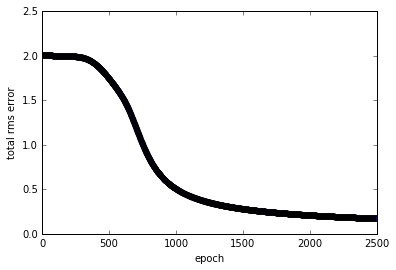

In [40]:
# XOR training

inputs = [[0,0], [0,1], [1,0], [1,1]]
outputs = [[0], [1], [1], [0]]
formatted_inputs = []
formatted_outputs = []

for i in inputs:
    formatted_inputs.append(np.array([i]).T)
for o in outputs:
    formatted_outputs.append(np.array([o]))
    
neural_net_XOR = Network([2,2,1])
neural_net_XOR.stoch_minibatch_GD(zip(formatted_inputs, formatted_outputs), 2500, 2)

In [41]:
# XOR testing

def predict_XOR(input):
    formatted_input = np.reshape(input,(2,1))
    prediction = neural_net_XOR.determine(formatted_input)
    if prediction > 0.5:
        return 1
    else:
        return 0

num_correct = 0
for inp, outp in zip(inputs, outputs):
    if predict_XOR(inp) == outp[0]:
        num_correct += 1
print "XOR Accuracy:", num_correct,"/ 4"

XOR Accuracy: 4 / 4


In [48]:
#Helpers taken from http://neuralnetworksanddeeplearning.com/chap1.html

def mnist_load_data():
    f = gzip.open('mnist_data/mnist.pkl.gz', 'rb') #Change according to your data directory
    training_data, validation_data, test_data = cPickle.load(f)
    f.close()
    return (training_data, validation_data, test_data)

def mnist_load_data_wrapper():
    tr_d, va_d, te_d = mnist_load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [mnist_vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def mnist_vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

Epoch 0 , Error: 4355.52839742
Epoch 1 , Error: 2861.05192697
Epoch 2 , Error: 2506.066956
Epoch 3 , Error: 2319.97856022
Epoch 4 , Error: 2016.07768854
Epoch 5 , Error: 1975.28726337
Epoch 6 , Error: 1886.87020112
Epoch 7 , Error: 1754.19071675
Epoch 8 , Error: 1736.00967555
Epoch 9 , Error: 1630.54080331
Epoch 10 , Error: 1568.27084643
Epoch 11 , Error: 1654.55168052
Epoch 12 , Error: 1465.86605895
Epoch 13 , Error: 1425.24772231
Epoch 14 , Error: 1597.85665118
Epoch 15 , Error: 1403.27229132
Epoch 16 , Error: 1396.82162186
Epoch 17 , Error: 1303.58074744
Epoch 18 , Error: 1347.94015954
Epoch 19 , Error: 1270.68308867
Epoch 20 , Error: 1209.5316295
Epoch 21 , Error: 1405.84299286
Epoch 22 , Error: 1289.38543959
Epoch 23 , Error: 1210.10324787
Epoch 24 , Error: 1199.76247907
Epoch 25 , Error: 1137.55570536
Epoch 26 , Error: 1125.29770645
Epoch 27 , Error: 1201.19393842
Epoch 28 , Error: 1206.10061743
Epoch 29 , Error: 1153.82475752


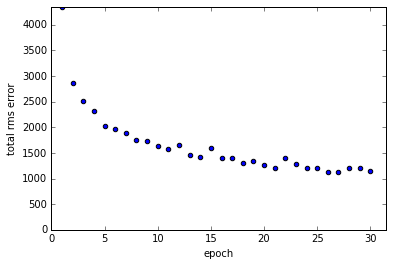

In [49]:
# MNIST training

mnist_training_data, validation_data, mnist_testing_data = mnist_load_data_wrapper()
neural_net_MNIST = Network([784, 30, 10])
neural_net_MNIST.stoch_minibatch_GD(mnist_training_data, 30, 3.0, batch_size=10)

In [51]:
# MNIST testing

def predict_mnist(inputs):
    prediction = neural_net_MNIST.determine(inputs)
    return np.argmax(prediction)

num_correct = 0
for inputs, outp in mnist_testing_data:
    if predict_mnist(inputs) == outp:
        num_correct += 1
print "MNIST Accuracy:", num_correct,"/ 10000"

MNIST Accuracy: 9482 / 10000


In [52]:
#Helper from https://www.cs.toronto.edu/~kriz/cifar.html
#Dataset from tech report associated with https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

#Self coded

def format_cifar_inp(x):
    #rgb = np.array([x[k:k+1024] for k in range(0, 3072, 1024)]).T
    #greyscale = np.array([np.mean(rgb, axis=1)]).T
    #return greyscale / 255.
    return np.reshape(x/255., (3072,1))

#Helpers based on above helpers

def cifar_load_data_wrapper():
    training_data = []
    for i in range(1,6):
        batch_data = unpickle('cifar_data/cifar-10-batches-py/data_batch_' + str(i))   #Change according to your data directory
        training_inputs = batch_data.get('data')
        tr_l = batch_data.get('labels')
        training_results = [cifar_vectorized_result(y) for y in tr_l]
        training_inputs_formatted = [format_cifar_inp(x) for x in training_inputs]
        training_data.extend(zip(training_inputs_formatted, training_results))
    test_batch = unpickle('cifar_data/cifar-10-batches-py/test_batch')
    testing_inputs = test_batch.get('data')
    tst_l = test_batch.get('labels')
    testing_inputs_formatted = [format_cifar_inp(x) for x in testing_inputs]
    testing_data = zip(testing_inputs_formatted, tst_l)
    return (training_data, testing_data)

def cifar_vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e


Epoch 0 , Error: 14797.477337
Epoch 1 , Error: 14486.8427963
Epoch 2 , Error: 14289.3991343
Epoch 3 , Error: 14083.8422085
Epoch 4 , Error: 14420.5594792
Epoch 5 , Error: 14009.701793
Epoch 6 , Error: 14012.9664424
Epoch 7 , Error: 13801.2926291
Epoch 8 , Error: 14053.4366009
Epoch 9 , Error: 13972.7833169
Epoch 10 , Error: 13886.3430737
Epoch 11 , Error: 13812.3733816
Epoch 12 , Error: 13974.6632414
Epoch 13 , Error: 13927.6152773
Epoch 14 , Error: 13612.1130745
Epoch 15 , Error: 13946.426732
Epoch 16 , Error: 13830.5979134
Epoch 17 , Error: 13849.7635814
Epoch 18 , Error: 13861.6120575
Epoch 19 , Error: 13694.8045586
Epoch 20 , Error: 13845.3207641
Epoch 21 , Error: 13768.2289533
Epoch 22 , Error: 13756.9185345
Epoch 23 , Error: 13696.9747486
Epoch 24 , Error: 13692.3156551
Epoch 25 , Error: 13657.58676
Epoch 26 , Error: 13679.2902454
Epoch 27 , Error: 13582.1870639
Epoch 28 , Error: 13484.832019
Epoch 29 , Error: 13755.8881281


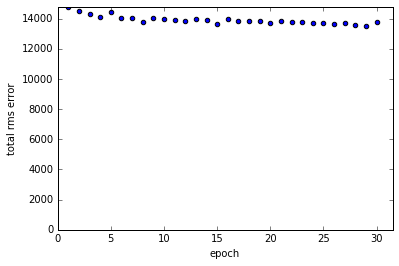

In [55]:
# CIFAR training

cifar_training_data, cifar_testing_data = cifar_load_data_wrapper()
neural_net_CIFAR = Network([3072, 30, 20, 10])
neural_net_CIFAR.stoch_minibatch_GD(cifar_training_data, 30, 3, batch_size=10)

In [57]:
# CIFAR Testing
def predict_cifar(inputs):
    prediction = neural_net_CIFAR.determine(inputs)
    return np.argmax(prediction)
num_correct = 0
for inputs, outp in cifar_testing_data:
    if predict_cifar(inputs) == outp:
        num_correct += 1
print "CIFAR Accuracy:", num_correct,"/ 10000"

CIFAR Accuracy: 3335 / 10000
